In [1]:
# Install library for reading JPK File
%pip uninstall jpkreader --yes
%pip install git+https://github.com/jlopezalo/pyjpkreader

Found existing installation: jpkreader 0.0.1
Uninstalling jpkreader-0.0.1:
  Successfully uninstalled jpkreader-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyjpkreader to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-sc4o18f1
  Running command git clone -q https://github.com/jlopezalo/pyjpkreader /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-sc4o18f1
  Created wheel for jpkreader: filename=jpkreader-0.0.1-py3-none-any.whl size=10194 sha256=4bf67d56deb92e12e0009a59216973e897048cab0c216cade1ca408ecbaf58db
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-2q9eysxr/wheels/23/c0/8e/c378f28c65b0199f6092b6aa45e090c1ed6b4093f3adb03a15
Successfully built jpkreader
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install library for AFM data Rheology Analysis
%pip uninstall pyafmrheo --yes
%pip install git+https://github.com/jlopezalo/pyafmrheo.git

Found existing installation: pyafmrheo 0.0.1
Uninstalling pyafmrheo-0.0.1:
  Successfully uninstalled pyafmrheo-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmrheo.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-oe_kj4eg
  Running command git clone -q https://github.com/jlopezalo/pyafmrheo.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-oe_kj4eg
  Created wheel for pyafmrheo: filename=pyafmrheo-0.0.1-py3-none-any.whl size=23324 sha256=65edf13cf17ad3ff43aef305b873f513ed7f3f58dfc6b22334cd3714005237f6
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-c4w4r60e/wheels/fb/66/18/3e93b45c845b0d7b83ded1e127a1c127820d070ce5b71dece4
Successfully built pyafmrheo
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from pyafmrheo.routines.PiezoCharacterization import doPiezoCharacterization
from pyafmrheo.routines.ViscousDragSteps import doViscousDragSteps
from pyafmrheo.routines.Microrheology import doMicrorheologyAnalysis

plt.rcParams["figure.figsize"] = (20,10)

In [4]:
piezo_char_dataset = '/Users/javierlopez/Desktop/Data/javistuff/Gels-15122021/HeadPiezo/Calibration/'
viscous_drag_dataset = '/Users/javierlopez/Desktop/Gels-16122021/AGAROSE1/vDrag/'
microrheology_dataset = '/Users/javierlopez/Desktop/Gels-16122021/AGAROSE1/HeadRheo/'

In [5]:
def getFileList(directory):
    types = ('*.jpk-force', '*.jpk-force-map') # the tuple of file types
    dataset_files = []
    for files in types:
        dataset_files.extend(glob.glob(directory + '**/' + files, recursive=True)) 
    return dataset_files

# Piezo Characterization

In [6]:
piezo_char_files = getFileList(piezo_char_dataset)
piezo_char_results = []
for file_path in piezo_char_files:
    file_result = doPiezoCharacterization(file_path)
    piezo_char_results.append(file_result)
piezo_char_results_df = pd.concat(piezo_char_results, ignore_index=True)

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 do

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 do

In [7]:
piezo_char_results_df

,file_id,curve_idx,frequency,fi_degrees,amp_quotient,inVols
0,16.01.12.714,0,0.6,-0.236502,0.979659,1.297318e-08
1,16.01.12.714,0,1.0,-0.040625,0.981266,1.297318e-08
2,16.01.12.714,0,10.0,0.276227,0.992141,1.297318e-08
3,16.01.12.714,0,60.0,1.475273,0.982223,1.297318e-08
4,16.01.12.714,0,120.0,2.489659,1.005135,1.297318e-08
...,...,...,...,...,...,...
184,16.04.38.920,0,120.0,2.593343,1.002152,1.297318e-08
185,16.04.38.920,0,200.0,3.245723,1.193289,1.297318e-08
186,16.04.38.920,0,800.0,16.494070,0.839759,1.297318e-08
187,16.04.38.920,0,1200.0,27.316253,0.705589,1.297318e-08


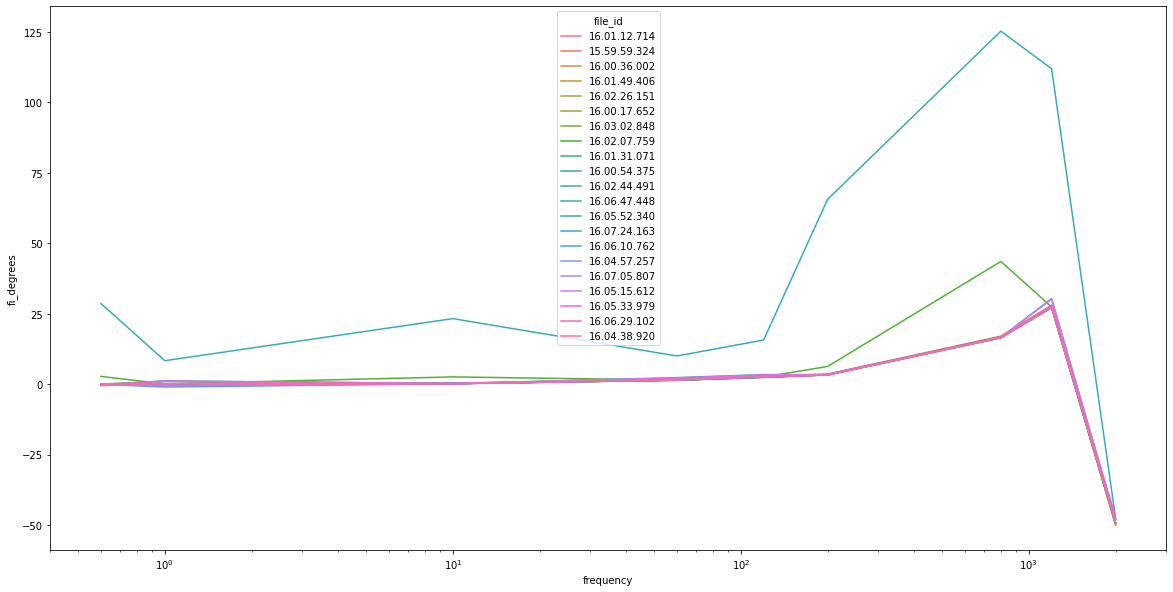

In [8]:
sns.lineplot(data=piezo_char_results_df, x="frequency", y="fi_degrees", hue="file_id")
plt.xscale('log')
plt.show()

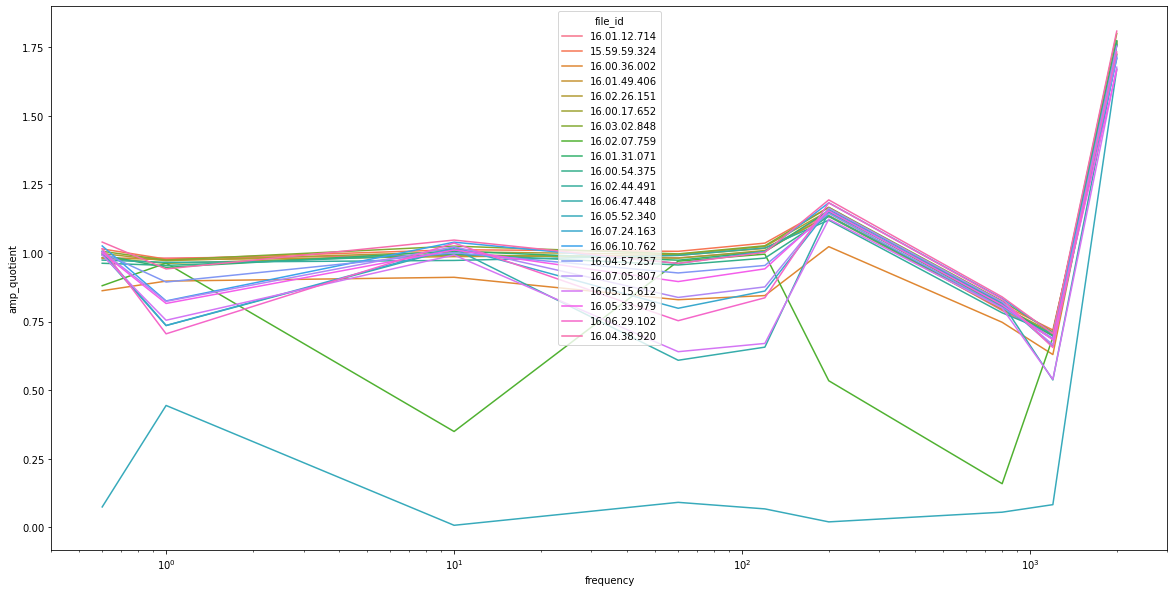

In [9]:
sns.lineplot(data=piezo_char_results_df, x="frequency", y="amp_quotient", hue="file_id")
plt.xscale('log')
plt.show()

In [10]:
grouped_piezo_char_results = piezo_char_results_df.groupby(['frequency'], as_index=False).mean()

In [11]:
grouped_piezo_char_results

,frequency,curve_idx,fi_degrees,amp_quotient,inVols
0,0.6,0,1.441895,0.942390,1.297318e-08
1,1.0,0,0.494720,0.868780,1.297318e-08
2,10.0,0,1.427159,0.925726,1.297318e-08
3,60.0,0,2.022623,0.864161,1.297318e-08
4,120.0,0,3.302950,0.896714,1.297318e-08
5,200.0,0,6.454856,1.063601,1.297318e-08
6,800.0,0,23.080025,0.740576,1.297318e-08
7,1200.0,0,31.753296,0.646691,1.297318e-08
8,2000.0,0,-48.665404,1.740892,1.297318e-08


In [12]:
grouped_piezo_char_results.describe()

,frequency,curve_idx,fi_degrees,amp_quotient,inVols
count,9.000000,9.0,9.000000,9.000000,9.000000e+00
mean,487.955556,0.0,2.368013,0.965503,1.297318e-08
std,706.682013,0.0,22.135491,0.314157,1.754715e-24
min,0.600000,0.0,-48.665404,0.646691,1.297318e-08
25%,10.000000,0.0,1.427159,0.864161,1.297318e-08
50%,120.000000,0.0,2.022623,0.896714,1.297318e-08
75%,800.000000,0.0,6.454856,0.942390,1.297318e-08
max,2000.000000,0.0,31.753296,1.740892,1.297318e-08


# Viscous Drag

In [13]:
vdrag_files = getFileList(viscous_drag_dataset)
vdrag_results = []
for file_path in vdrag_files:
    file_result = doViscousDragSteps(file_path, piezoCharData=grouped_piezo_char_results)
    vdrag_results.append(file_result)
vdrag_results_df = pd.concat(vdrag_results, ignore_index=True)

Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The freque

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0


/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo c

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '



5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization 

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency 

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-0

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-0

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-0

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-0

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

In [14]:
vdrag_results_df

,file_id,curve_idx,seg_id,distance,frequency,Bh,Hd,fi,amp_quotient,inVols,k
0,20.01.50.226,0,3,5.000000e-07,800.0,4.670501e-07,-0.000979+0.002348j,23.080025,0.740576,7.840027e-09,0.101
1,20.01.50.226,0,5,1.000000e-06,800.0,3.606577e-07,-0.001659+0.001813j,23.080025,0.740576,7.840027e-09,0.101
2,20.01.50.226,0,7,1.500000e-06,800.0,3.736554e-07,-0.001659+0.001878j,23.080025,0.740576,7.840027e-09,0.101
3,20.01.50.226,0,9,2.000000e-06,800.0,3.786255e-07,-0.001678+0.001903j,23.080025,0.740576,7.840027e-09,0.101
4,20.01.50.226,0,11,2.500000e-06,800.0,3.824695e-07,-0.001687+0.001923j,23.080025,0.740576,7.840027e-09,0.101
...,...,...,...,...,...,...,...,...,...,...,...
379,20.07.19.893,15,5,1.000000e-06,500.0,7.520751e-07,0.000693+0.002363j,0.000000,1.000000,7.840027e-09,0.101
380,20.07.19.893,15,7,1.500000e-06,500.0,7.449829e-07,0.000667+0.002340j,0.000000,1.000000,7.840027e-09,0.101
381,20.07.19.893,15,9,2.000000e-06,500.0,7.759045e-07,0.000658+0.002438j,0.000000,1.000000,7.840027e-09,0.101
382,20.07.19.893,15,11,2.500000e-06,500.0,7.580670e-07,0.000605+0.002382j,0.000000,1.000000,7.840027e-09,0.101


In [15]:
vdrag_results_df.describe()

,curve_idx,distance,frequency,Bh,Hd,fi,amp_quotient,inVols,k
count,384.000000,3.840000e+02,384.000000,3.840000e+02,384.00000+0.00000j,384.000000,384.000000,3.840000e+02,3.840000e+02
mean,7.500000,1.750000e-06,650.000000,5.533411e-07,-0.000480+0.002105j,11.540013,0.870288,7.840027e-09,1.010000e-01
std,4.615786,8.550266e-07,150.195695,2.301340e-07,0.001404+0.000000j,11.555068,0.129881,7.619990e-23,3.612932e-16
min,0.000000,5.000000e-07,500.000000,-1.455514e-06,-0.003236+0.003230j,0.000000,0.740576,7.840027e-09,1.010000e-01
25%,3.750000,1.000000e-06,500.000000,3.822291e-07,-0.001689+0.001878j,0.000000,0.740576,7.840027e-09,1.010000e-01
50%,7.500000,1.750000e-06,650.000000,4.846890e-07,-0.000138+0.002442j,11.540013,0.870288,7.840027e-09,1.010000e-01
75%,11.250000,2.500000e-06,800.000000,7.621388e-07,0.000620+0.002402j,23.080025,1.000000,7.840027e-09,1.010000e-01
max,15.000000,3.000000e-06,800.000000,7.805879e-07,0.007763-0.002462j,23.080025,1.000000,7.840027e-09,1.010000e-01


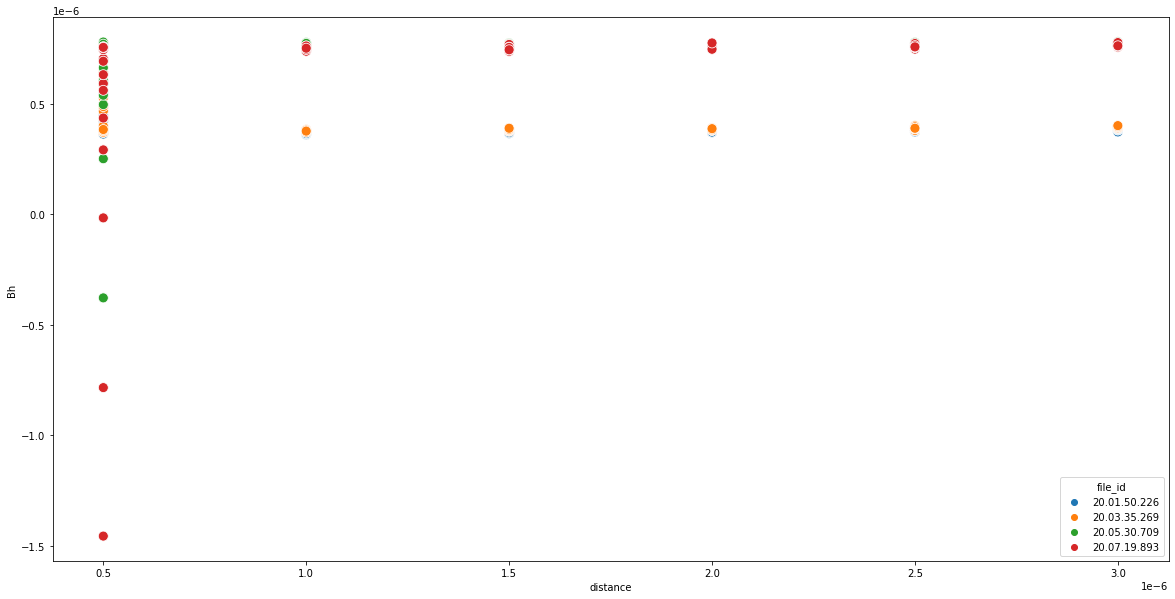

In [16]:
sns.scatterplot(data=vdrag_results_df, x="distance", y="Bh", hue="file_id", s=100)
plt.show()

In [17]:
grouped_vdrag_results = vdrag_results_df.groupby(['distance'], as_index=False).mean()
# grouped_vdrag_results = vdrag_results_df.groupby(['distance'], as_index=False).median()

In [18]:
grouped_vdrag_results

,distance,curve_idx,frequency,Bh,fi,amp_quotient,inVols,k
0,5.000000e-07,7.5,650.0,4.561434e-07,11.540013,0.870288,7.840027e-09,0.101
1,1.000000e-06,7.5,650.0,5.669032e-07,11.540013,0.870288,7.840027e-09,0.101
2,1.500000e-06,7.5,650.0,5.692113e-07,11.540013,0.870288,7.840027e-09,0.101
3,2.000000e-06,7.5,650.0,5.721612e-07,11.540013,0.870288,7.840027e-09,0.101
4,2.500000e-06,7.5,650.0,5.756153e-07,11.540013,0.870288,7.840027e-09,0.101
5,3.000000e-06,7.5,650.0,5.800120e-07,11.540013,0.870288,7.840027e-09,0.101


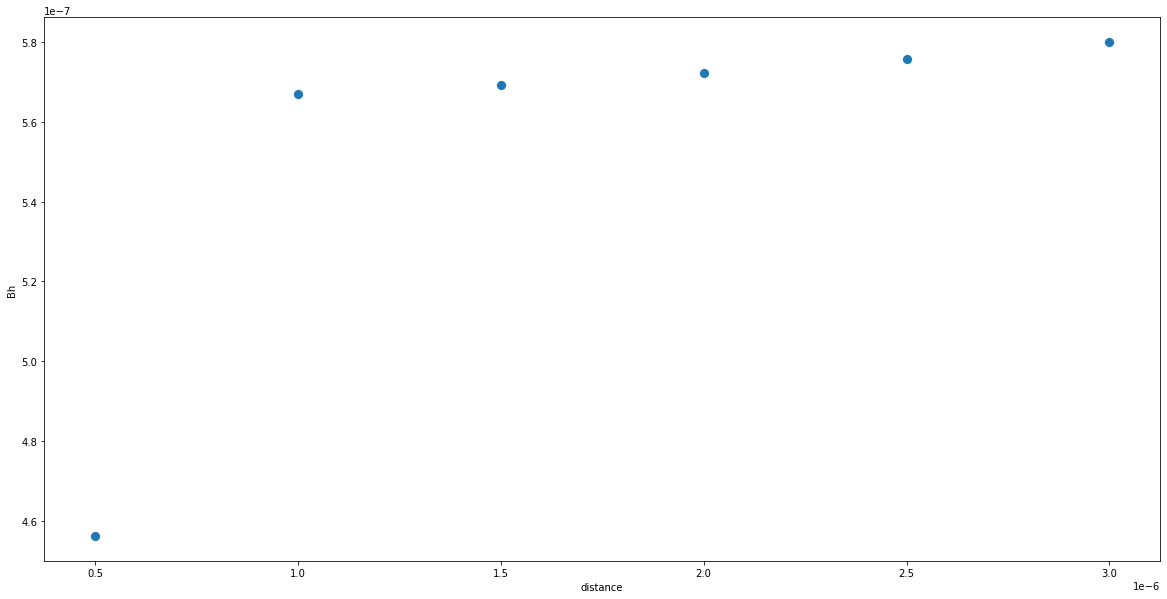

In [19]:
sns.scatterplot(data=grouped_vdrag_results, x="distance", y="Bh", s=100)
plt.show()

# Microrheology

In [20]:
# Define parameters for data analysis
poc_win_size = 50
indenter_shape = 'paraboloid'
tip_parameter = 75 * 1e-9

In [32]:
microrheo_files = getFileList(microrheology_dataset)
microrheo_results = []
for file_path in microrheo_files:
    file_result = doMicrorheologyAnalysis(file_path, poc_win_size, indenter_shape, tip_parameter, bcoef=5.7 * 1e-7, piezoCharData=grouped_piezo_char_results)
    microrheo_results.append(file_result)
microrheo_results_df = pd.concat(microrheo_results, ignore_index=True)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/

The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.984214680347

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.984214680347

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.984214680347

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.984214680347

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.984214680347

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

In [33]:
microrheo_results_df

,file_id,curve_idx,seg_id,indenter_shape,hertz_E,tip_parameter,frequency,G_storage,G_loss,loss_tan,fi,amp_quotient,inVols,k
0,19.14.46.893,0,2,paraboloid,9562.953091,7.500000e-08,2000.0,-73705.091476,79810.643370,-1.082838,1.427159,0.925726,7.840027e-09,0.101
1,19.14.46.893,0,3,paraboloid,9562.953091,7.500000e-08,1.0,16791.259518,390.399006,0.023250,1.427159,0.925726,7.840027e-09,0.101
2,19.14.46.893,0,4,paraboloid,9562.953091,7.500000e-08,60.0,15508.943242,-2609.330992,-0.168247,1.427159,0.925726,7.840027e-09,0.101
3,19.14.46.893,0,5,paraboloid,9562.953091,7.500000e-08,120.0,12961.476980,-1345.669822,-0.103821,1.427159,0.925726,7.840027e-09,0.101
4,19.14.46.893,0,6,paraboloid,9562.953091,7.500000e-08,1200.0,10810.432702,62913.091003,5.819664,1.427159,0.925726,7.840027e-09,0.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,19.20.03.136,15,6,paraboloid,33392.591055,7.500000e-08,1200.0,30996.631549,50782.627205,1.638327,1.427159,0.925726,7.840027e-09,0.101
1148,19.20.03.136,15,7,paraboloid,33392.591055,7.500000e-08,0.6,13929.165293,87.546287,0.006285,1.427159,0.925726,7.840027e-09,0.101
1149,19.20.03.136,15,8,paraboloid,33392.591055,7.500000e-08,200.0,8256.633355,176.322842,0.021355,1.427159,0.925726,7.840027e-09,0.101
1150,19.20.03.136,15,9,paraboloid,33392.591055,7.500000e-08,10.0,14960.714214,-654.562069,-0.043752,1.427159,0.925726,7.840027e-09,0.101


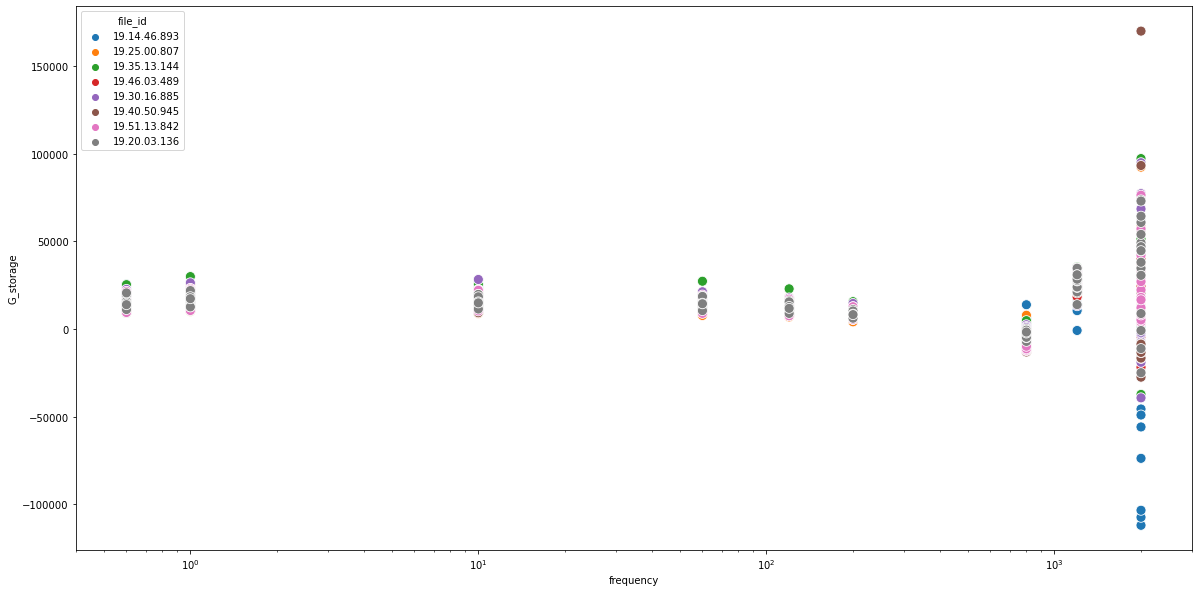

In [34]:
sns.scatterplot(data=microrheo_results_df, x="frequency", y="G_storage", hue="file_id", s=100)
plt.xscale('log')
plt.show()

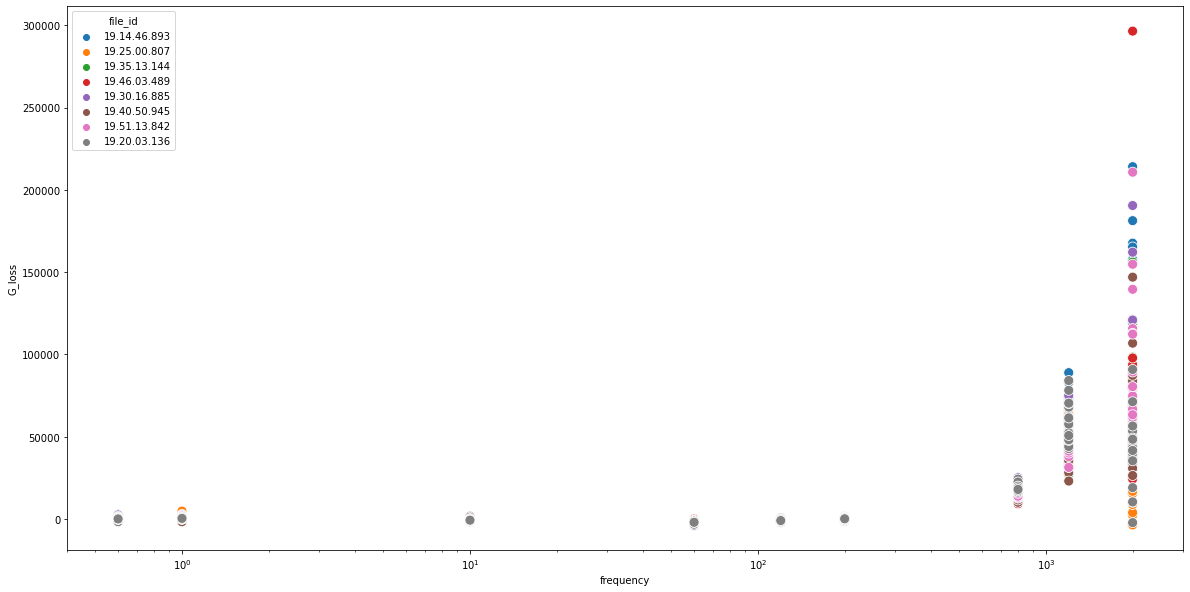

In [35]:
sns.scatterplot(data=microrheo_results_df, x="frequency", y="G_loss", hue="file_id", s=100)
plt.xscale('log')
plt.show()

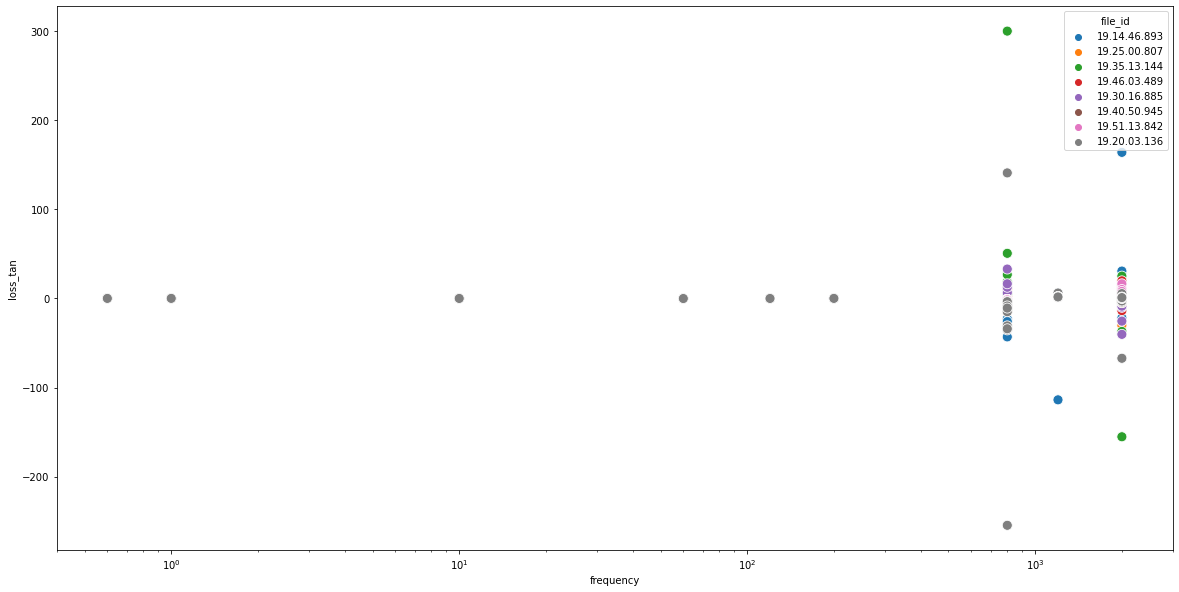

In [36]:
sns.scatterplot(data=microrheo_results_df, x="frequency", y="loss_tan", hue="file_id", s=100)
plt.xscale('log')
plt.show()

In [37]:
microrheo_results_results = microrheo_results_df.groupby(['frequency'], as_index=False).mean()

In [38]:
microrheo_results_results

,frequency,curve_idx,hertz_E,tip_parameter,G_storage,G_loss,loss_tan,fi,amp_quotient,inVols,k
0,0.6,7.5,27158.408988,7.500000e-08,15313.673125,479.622919,0.032782,1.427159,0.925726,7.840027e-09,0.101
1,1.0,7.5,27158.408988,7.500000e-08,16612.253790,786.183749,0.049926,1.427159,0.925726,7.840027e-09,0.101
2,10.0,7.5,27158.408988,7.500000e-08,15615.761362,-540.852159,-0.032666,1.427159,0.925726,7.840027e-09,0.101
3,60.0,7.5,27158.408988,7.500000e-08,14386.867549,-1876.762148,-0.128666,1.427159,0.925726,7.840027e-09,0.101
4,120.0,7.5,27158.408988,7.500000e-08,12197.672666,-1014.246712,-0.080069,1.427159,0.925726,7.840027e-09,0.101
5,200.0,7.5,27158.408988,7.500000e-08,8791.520367,178.429677,0.027737,1.427159,0.925726,7.840027e-09,0.101
6,800.0,7.5,27158.408988,7.500000e-08,-4701.075205,16627.461717,-1.533523,1.427159,0.925726,7.840027e-09,0.101
7,1200.0,7.5,27158.408988,7.500000e-08,25891.754325,49196.483951,1.105715,1.427159,0.925726,7.840027e-09,0.101
8,2000.0,7.5,27158.408988,7.500000e-08,18820.354907,72201.566032,-0.021367,1.427159,0.925726,7.840027e-09,0.101


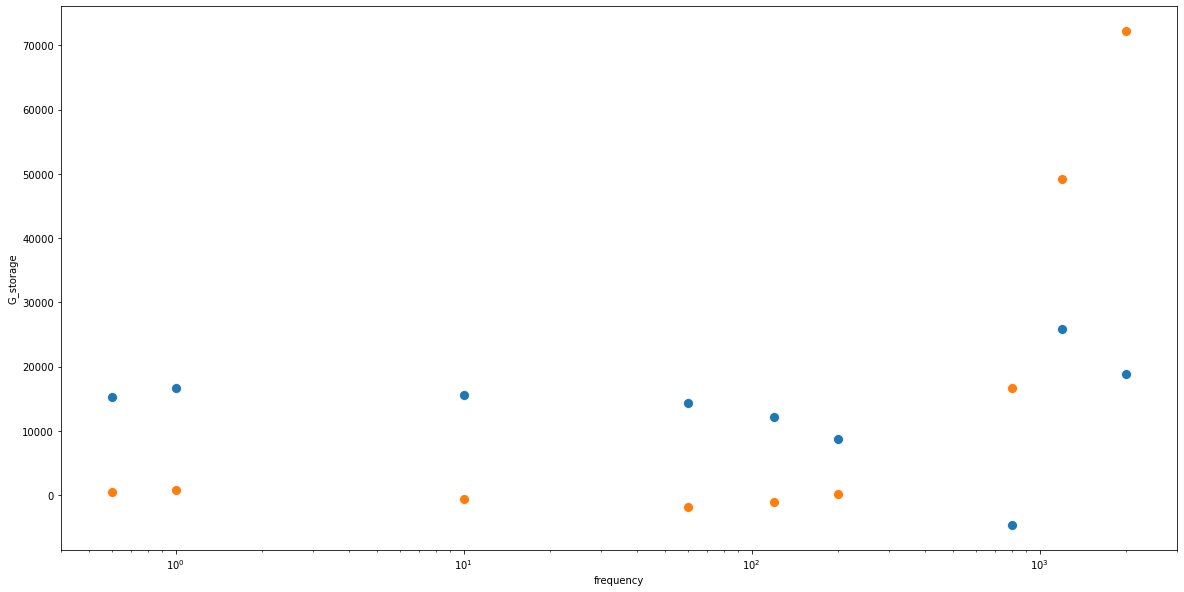

In [39]:
sns.scatterplot(data=microrheo_results_results, x="frequency", y="G_storage", s=100)
sns.scatterplot(data=microrheo_results_results, x="frequency", y="G_loss", s=100)
plt.xscale('log')
plt.show()